# Life Science Project on IRIS Flower Dataset

Project Overview

This project involves a comprehensive analysis of the Iris dataset, a widely used dataset in machine learning, to perform exploratory data analysis (EDA), clustering, classification, and neural network modeling. The objective is to uncover insights from the dataset, visualize data patterns, and apply various machine learning techniques to classify and predict flower species based on their features.

In [1]:
import pandas as pd

# Load the Iris dataset
data_path = "D:/education/data_science/Interview/Iris.csv"
Iris = pd.read_csv(data_path)


In [2]:
# Check and assign the target column if necessary
if 'target' not in Iris.columns:
    Iris.rename(columns={'Species': 'target'}, inplace=True)  # Replace 'Species' with actual target column name if different


In [3]:
# Inspect the data
Iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
Iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   target         150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Check if target column is categorical
Iris['target'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

In [7]:
Iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
target           0
dtype: int64

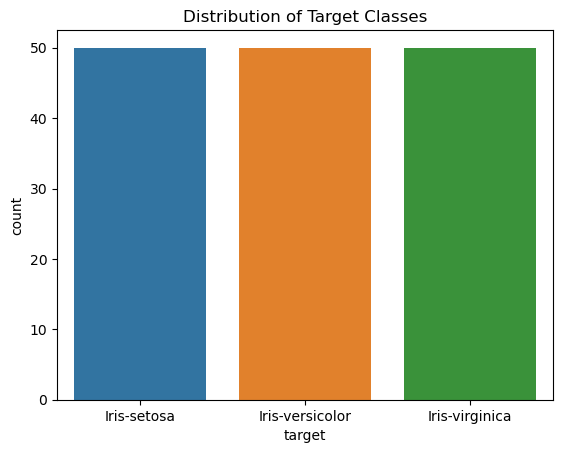

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the target column
sns.countplot(x='target', data=Iris)
plt.title('Distribution of Target Classes')
plt.show()

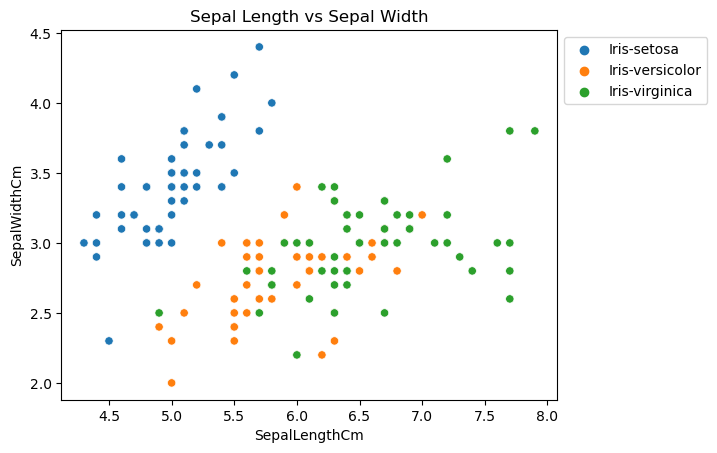

In [9]:
# Comparing Sepal Length and Sepal Width
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='target', data=Iris)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Sepal Length vs Sepal Width')
plt.show()

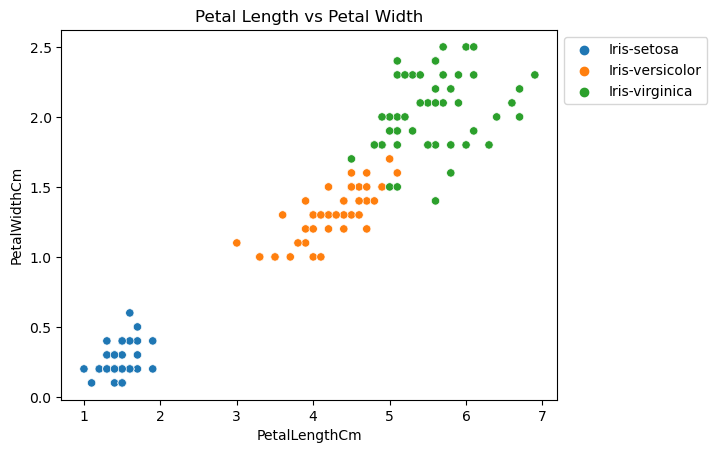

In [10]:
# Comparing Petal Length and Petal Width
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='target', data=Iris)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Petal Length vs Petal Width')
plt.show()

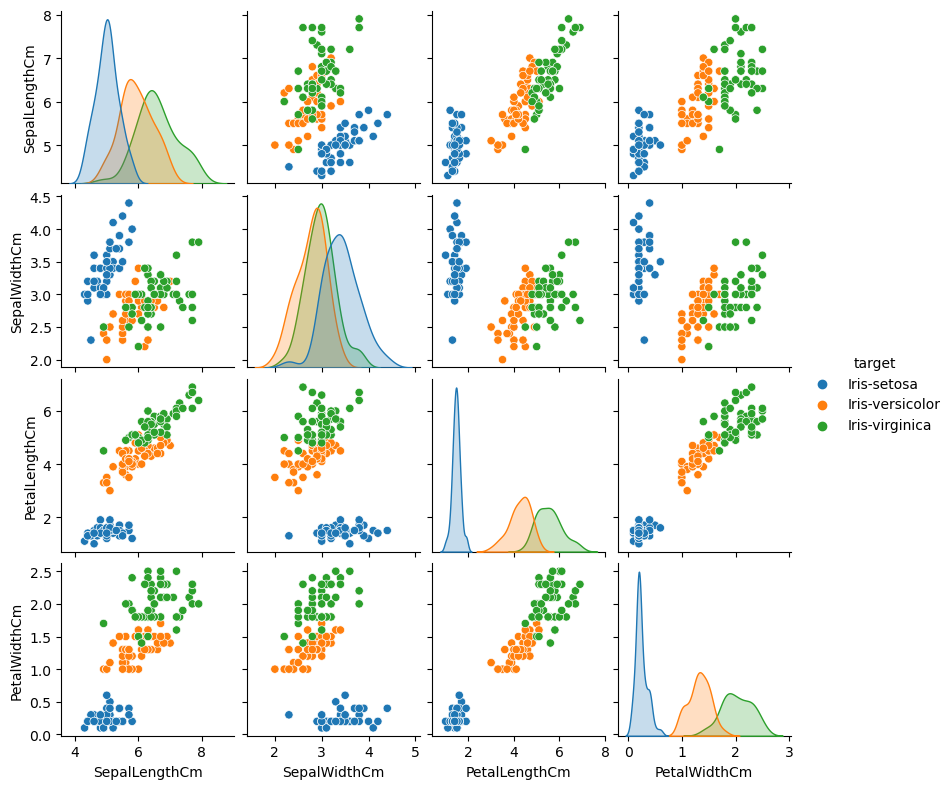

In [11]:
# Pairplot
sns.pairplot(Iris.drop(['Id'], axis=1), hue='target', height=2)
plt.show()

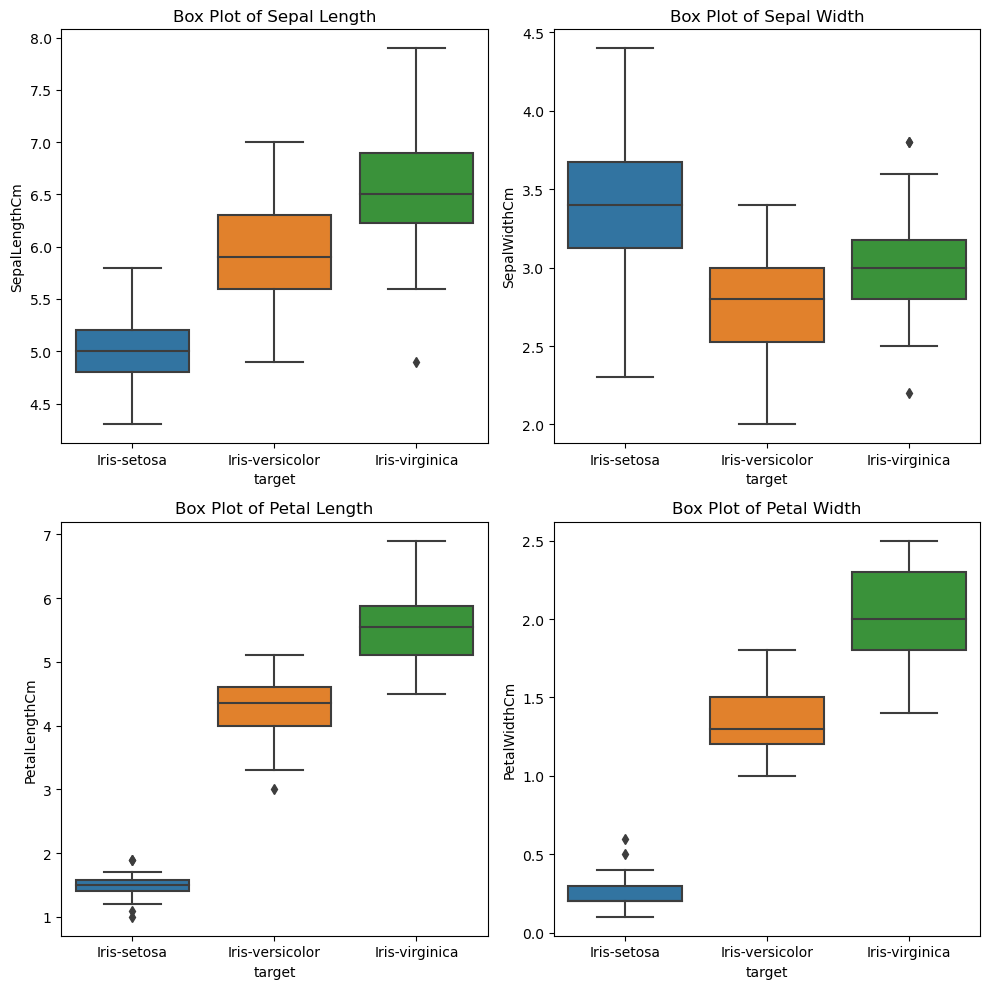

In [12]:
def plot_boxplots(df):
    plt.figure(figsize=(10,10))
    plt.subplot(221)
    sns.boxplot(x="target", y='SepalLengthCm', data=df).set_title('Box Plot of Sepal Length')
    plt.subplot(222)
    sns.boxplot(x="target", y='SepalWidthCm', data=df).set_title('Box Plot of Sepal Width')
    plt.subplot(223)
    sns.boxplot(x="target", y='PetalLengthCm', data=df).set_title('Box Plot of Petal Length')
    plt.subplot(224)
    sns.boxplot(x="target", y='PetalWidthCm', data=df).set_title('Box Plot of Petal Width')
    plt.tight_layout()
    plt.show()

plot_boxplots(Iris)

In [13]:
import numpy as np

def remove_outliers(df, column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


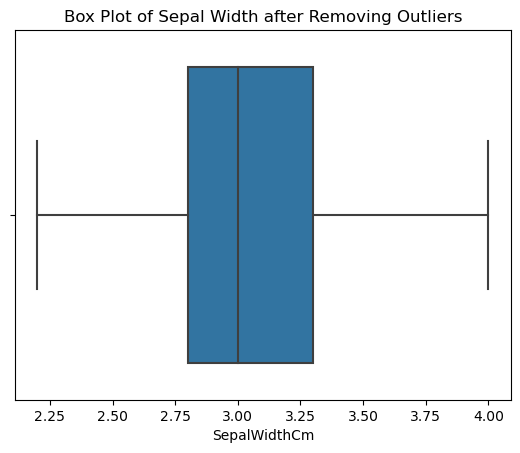

In [14]:
df = Iris.copy()
df = remove_outliers(df, 'SepalWidthCm')
sns.boxplot(x='SepalWidthCm', data=df)
plt.title('Box Plot of Sepal Width after Removing Outliers')
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(Iris[feature_columns])
data_scaled = pd.DataFrame(data_scaled, columns=feature_columns)
data_scaled['target'] = Iris['target']

In [16]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
Iris['target_encoded'] = label_encoder.fit_transform(Iris['target'])

# Use the encoded target for regression
data_scaled['target'] = Iris['target_encoded']


In [17]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Ensure 'target' is numeric; if not, use encoded target
if 'target_encoded' in data_scaled.columns:
    y = data_scaled['target_encoded']
else:
    y = data_scaled['target']

In [18]:
# Use only numerical columns for X
X = data_scaled[['SepalLengthCm']]

In [19]:
# Initialize and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [20]:
# Predict using the model
y_pred = lin_reg.predict(X)


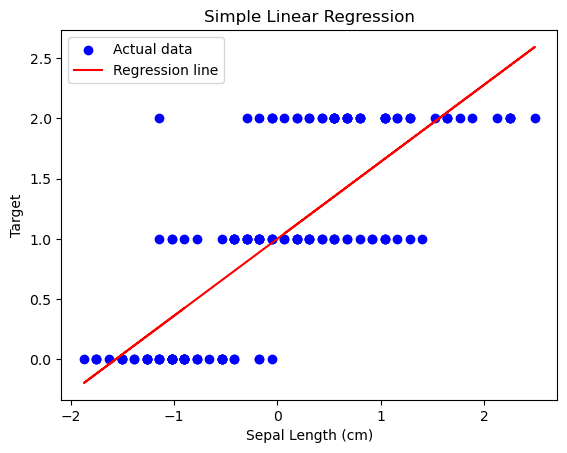

In [21]:
# Plotting the results
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Target')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

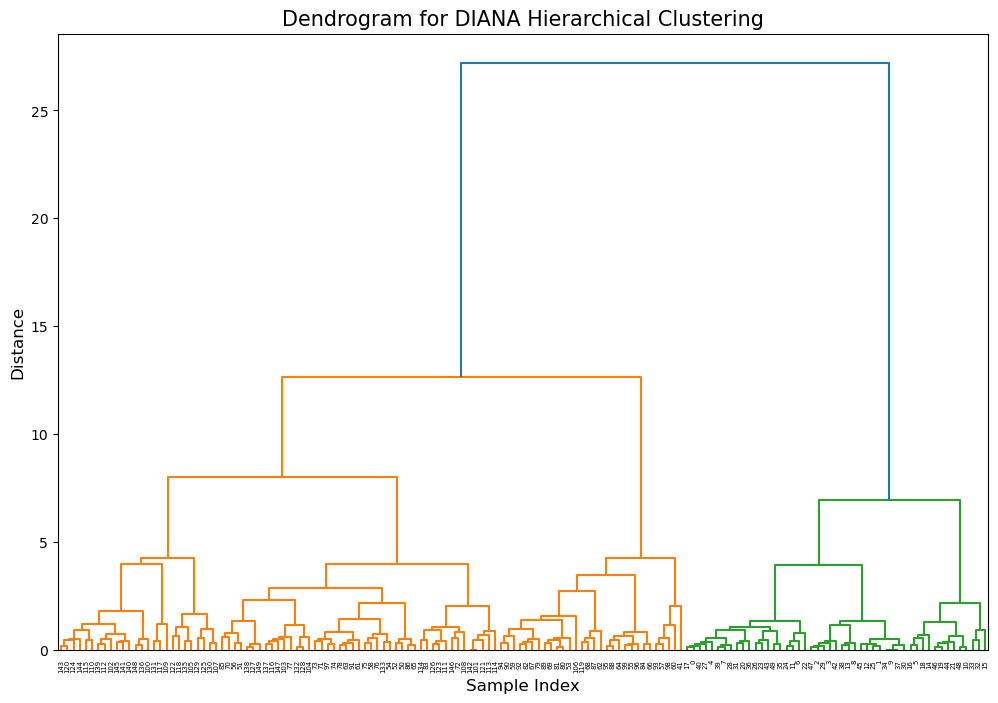

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Define feature columns for clustering
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Perform hierarchical clustering
linked = linkage(data_scaled[feature_columns], 'ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked,
           orientation='top',
           labels=data_scaled.index,
           distance_sort='descending',
           color_threshold=0.7*max(linked[:,2]))  # Color threshold to highlight clusters

# Add titles and labels
plt.title('Dendrogram for DIANA Hierarchical Clustering', fontsize=15)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Distance', fontsize=12)

# Display the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X = data_scaled[feature_columns]
y = data_scaled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



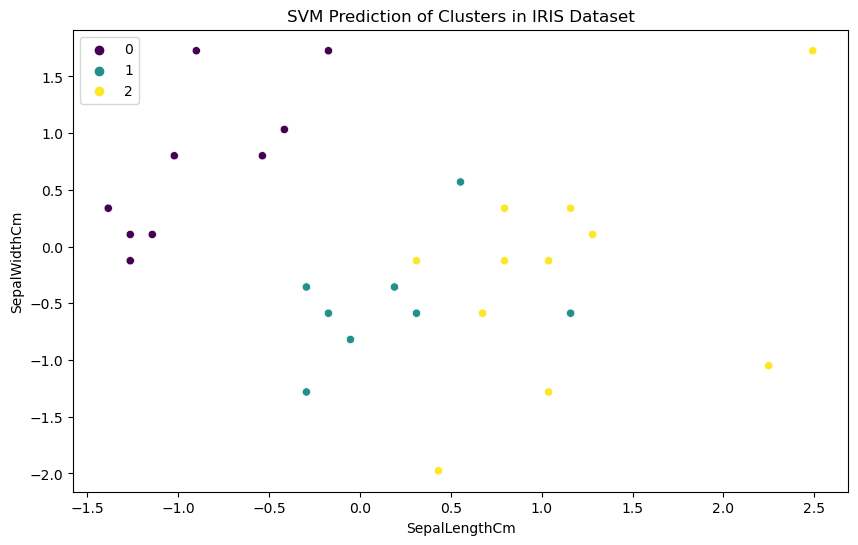

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['SepalLengthCm'], y=X_test['SepalWidthCm'], hue=y_pred, palette='viridis')
plt.title('SVM Prediction of Clusters in IRIS Dataset')
plt.show()

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)


In [26]:

# Define the neural network model
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(X_train_tensor.shape[1], 50)  # Input layer to hidden layer
        self.fc2 = nn.Linear(50, 3)  # Hidden layer to output layer
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation
        x = self.fc2(x)  # Pass through the output layer
        return x

# Initialize the model, define the loss function and the optimizer
model = NeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [27]:
# Train the model
epochs = 100
losses = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)  # Forward pass
    loss = criterion(outputs, y_train_tensor)  # Calculate loss
    loss.backward()  # Backward pass
    optimizer.step()  # Update weights
    losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.8037
Epoch [20/100], Loss: 0.7215
Epoch [30/100], Loss: 0.6514
Epoch [40/100], Loss: 0.5913
Epoch [50/100], Loss: 0.5398
Epoch [60/100], Loss: 0.4958
Epoch [70/100], Loss: 0.4581
Epoch [80/100], Loss: 0.4255
Epoch [90/100], Loss: 0.3967
Epoch [100/100], Loss: 0.3708


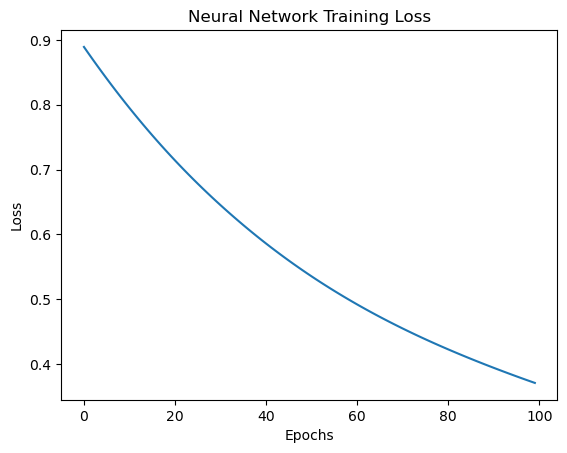

In [28]:
# Plot loss over epochs
import matplotlib.pyplot as plt

plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Neural Network Training Loss')
plt.show()

In [29]:
# Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 93.33%


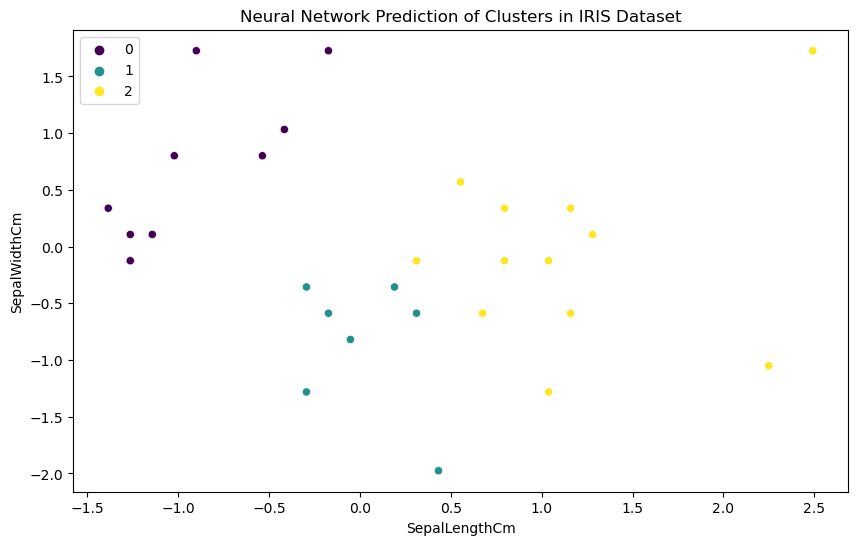

In [30]:
# Visualize Neural Network predictions
import seaborn as sns

predicted_labels = predicted.numpy()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['SepalLengthCm'], y=X_test['SepalWidthCm'], hue=predicted_labels, palette='viridis')
plt.title('Neural Network Prediction of Clusters in IRIS Dataset')
plt.show()

Impact and Learnings

This project provided hands-on experience in working with a real-world dataset, applying a range of machine learning techniques, and interpreting results. It demonstrated the ability to handle data preprocessing, build predictive models, and effectively visualize data and model outcomes.